In [20]:
import os
import cv2
import numpy as np
from pathlib import Path
from tqdm import tqdm

def preprocess_images(input_dir, output_dir, target_size=(512, 512)):
    """
    Przetwarza obrazy z folderu wejściowego i zapisuje je w folderze wyjściowym
    z zachowaniem struktury katalogów (stylu artystycznego).
    
    Args:
        input_dir: Ścieżka do folderu z oryginalnymi obrazami
        output_dir: Ścieżka do folderu, w którym zostaną zapisane przetworzone obrazy
        target_size: Docelowy rozmiar obrazów (szerokość, wysokość)
    """
    input_path = Path(input_dir)
    output_path = Path(output_dir)
    
    # Upewnij się, że folder wyjściowy istnieje
    output_path.mkdir(parents=True, exist_ok=True)
    
    # Iteruj przez style artystyczne (główne foldery)
    style_dirs = [d for d in input_path.iterdir() if d.is_dir()]
    
    for style_dir in style_dirs:
        style_name = style_dir.name
        output_style_dir = output_path / style_name
        output_style_dir.mkdir(exist_ok=True)
        
        # Znajdź podfoldery (uwzględnienie podwójnego zagnieżdżenia)
        sub_dirs = [d for d in style_dir.iterdir() if d.is_dir()]
        
        # Jeśli istnieją podfoldery, wejdź do nich
        if sub_dirs:
            for sub_dir in sub_dirs:
                # Przetwórz wszystkie obrazy w danym podkatalogu
                image_files = list(sub_dir.glob('*.jpg')) + list(sub_dir.glob('*.png')) + list(sub_dir.glob('*.jpeg'))
                print(f"Przetwarzanie {len(image_files)} obrazów w stylu {style_name}")
                
                for img_path in tqdm(image_files, desc=f"Styl: {style_name}"):
                    process_image(img_path, output_style_dir, target_size)
        else:
            # Jeśli nie ma podfolderów, przetwórz obrazy bezpośrednio w głównym folderze stylu
            image_files = list(style_dir.glob('*.jpg')) + list(style_dir.glob('*.png')) + list(style_dir.glob('*.jpeg'))
            print(f"Przetwarzanie {len(image_files)} obrazów w stylu {style_name}")
            
            for img_path in tqdm(image_files, desc=f"Styl: {style_name}"):
                process_image(img_path, output_style_dir, target_size)
    
    print("Zakończono preprocessing obrazów!")

def process_image(img_path, output_dir, target_size):
    """
    Przetwarza pojedynczy obraz.
    
    Args:
        img_path: Ścieżka do obrazu
        output_dir: Katalog wyjściowy
        target_size: Docelowy rozmiar obrazu
    """
    try:
        # Wczytaj obraz
        img = cv2.imread(str(img_path))
        if img is None:
            print(f"Nie udało się wczytać: {img_path}")
            return
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konwersja BGR na RGB
        
        # Sprawdź proporcje obrazu
        h, w = img.shape[:2]
        aspect_ratio = w / h
        
        # Sprawdź, czy obraz jest znacznie dłuższy w jednym z wymiarów
        if aspect_ratio > 3 or aspect_ratio < 1/3:
            # Obraz jest bardzo szeroki lub bardzo wysoki - przycinamy środek
            if w > h:
                # Szeroki obraz
                new_w = int(h * 1.5)  # Przytnij do proporcji 3:2
                start_x = int((w - new_w) / 2)
                img = img[:, start_x:start_x+new_w]
            else:
                # Wysoki obraz
                new_h = int(w * 1.5)  # Przytnij do proporcji 2:3
                start_y = int((h - new_h) / 2)
                img = img[start_y:start_y+new_h, :]
        
        # Skaluj obraz, zachowując proporcje
        h, w = img.shape[:2]
        if w > h:
            new_w = min(w, target_size[0])
            new_h = int(h * (new_w / w))
        else:
            new_h = min(h, target_size[1])
            new_w = int(w * (new_h / h))
        
        img_resized = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)
        
        # Utwórz pusty obraz o docelowym rozmiarze (dodaj padding)
        padded_img = np.zeros((target_size[1], target_size[0], 3), dtype=np.uint8)
        
        # Umieść przeskalowany obraz na środku
        start_x = (target_size[0] - new_w) // 2
        start_y = (target_size[1] - new_h) // 2
        padded_img[start_y:start_y+new_h, start_x:start_x+new_w] = img_resized
        
        # Zapisz przetworzony obraz
        output_file = output_dir / img_path.name
        cv2.imwrite(str(output_file), cv2.cvtColor(padded_img, cv2.COLOR_RGB2BGR))
        
    except Exception as e:
        print(f"Błąd podczas przetwarzania {img_path}: {e}")

# Ścieżki zgodne z podanymi
input_directory = r"C:\Users\Dominik\Desktop\DataSet"
output_directory = r"C:\Users\Dominik\Desktop\outData"

if __name__ == "__main__":
    # Przetwórz obrazy do rozmiaru 512x512
    preprocess_images(input_directory, output_directory, target_size=(512, 512))
    
    # Alternatywnie, możesz użyć rozmiaru 256x256 dla szybszego treningu
    # preprocess_images(input_directory, output_directory, target_size=(256, 256))

Przetwarzanie 1305 obrazów w stylu Academic_Art


Styl: Academic_Art: 100%|██████████| 1305/1305 [00:55<00:00, 23.37it/s] 


Przetwarzanie 3035 obrazów w stylu Art_Nouveau


Styl: Art_Nouveau:  18%|█▊        | 544/3035 [00:49<02:37, 15.83it/s]

Nie udało się wczytać: C:\Users\Dominik\Desktop\DataSet\Art_Nouveau\Art_Nouveau\245733.jpg


Styl: Art_Nouveau: 100%|██████████| 3035/3035 [02:53<00:00, 17.47it/s]


Przetwarzanie 5312 obrazów w stylu Baroque


Styl: Baroque:  14%|█▍        | 740/5312 [00:34<04:31, 16.84it/s]

Nie udało się wczytać: C:\Users\Dominik\Desktop\DataSet\Baroque\Baroque\220102.jpg
Nie udało się wczytać: C:\Users\Dominik\Desktop\DataSet\Baroque\Baroque\220106.jpg


Styl: Baroque:  28%|██▊       | 1461/5312 [01:09<03:12, 19.98it/s]

Nie udało się wczytać: C:\Users\Dominik\Desktop\DataSet\Baroque\Baroque\232176.jpg


Styl: Baroque:  28%|██▊       | 1506/5312 [01:12<02:48, 22.58it/s]

Nie udało się wczytać: C:\Users\Dominik\Desktop\DataSet\Baroque\Baroque\232223.jpg


Styl: Baroque: 100%|██████████| 5312/5312 [04:43<00:00, 18.72it/s]


Przetwarzanie 2607 obrazów w stylu Expressionism


Styl: Expressionism: 100%|██████████| 2607/2607 [02:35<00:00, 16.75it/s]


Przetwarzanie 2235 obrazów w stylu Japanese_Art


Styl: Japanese_Art:  16%|█▌        | 354/2235 [00:26<01:13, 25.54it/s]

Nie udało się wczytać: C:\Users\Dominik\Desktop\DataSet\Japanese_Art\Japanese_Art\223666.jpg


Styl: Japanese_Art:  42%|████▏     | 944/2235 [01:08<00:39, 32.43it/s]

Nie udało się wczytać: C:\Users\Dominik\Desktop\DataSet\Japanese_Art\Japanese_Art\242432.jpg


Styl: Japanese_Art: 100%|██████████| 2235/2235 [02:23<00:00, 15.54it/s]


Przetwarzanie 3115 obrazów w stylu Neoclassicism


Styl: Neoclassicism: 100%|██████████| 3115/3115 [02:57<00:00, 17.52it/s]


Przetwarzanie 1324 obrazów w stylu Primitivism


Styl: Primitivism: 100%|██████████| 1324/1324 [01:15<00:00, 17.60it/s]


Przetwarzanie 5373 obrazów w stylu Realism


Styl: Realism: 100%|██████████| 5373/5373 [03:59<00:00, 22.43it/s]


Przetwarzanie 6192 obrazów w stylu Renaissance


Styl: Renaissance:  64%|██████▍   | 3971/6192 [03:27<01:23, 26.60it/s]

Nie udało się wczytać: C:\Users\Dominik\Desktop\DataSet\Renaissance\Renaissance\241406.jpg


Styl: Renaissance:  70%|██████▉   | 4316/6192 [03:43<01:32, 20.39it/s]

Nie udało się wczytać: C:\Users\Dominik\Desktop\DataSet\Renaissance\Renaissance\249071.jpg


Styl: Renaissance: 100%|██████████| 6192/6192 [06:10<00:00, 16.71it/s]


Przetwarzanie 2521 obrazów w stylu Rococo


Styl: Rococo: 100%|██████████| 2521/2521 [02:10<00:00, 19.26it/s]


Przetwarzanie 6813 obrazów w stylu Romanticism


Styl: Romanticism:  38%|███▊      | 2569/6813 [01:43<02:04, 34.12it/s]

Nie udało się wczytać: C:\Users\Dominik\Desktop\DataSet\Romanticism\Romanticism\209824.jpg


Styl: Romanticism: 100%|██████████| 6813/6813 [05:25<00:00, 20.90it/s]


Przetwarzanie 1510 obrazów w stylu Symbolism


Styl: Symbolism: 100%|██████████| 1510/1510 [01:12<00:00, 20.77it/s]


Przetwarzanie 1158 obrazów w stylu Western_Medieval


Styl: Western_Medieval: 100%|██████████| 1158/1158 [01:43<00:00, 11.18it/s]

Zakończono preprocessing obrazów!


Analizowanie stylów: 100%|██████████| 13/13 [00:01<00:00, 11.80it/s]


Wizualizacje zostały zapisane w: C:\Users\Dominik\Desktop\outData\visualizations
- Histogram stylów: C:\Users\Dominik\Desktop\outData\visualizations\style_histogram.png
- Przykładowe obrazy: C:\Users\Dominik\Desktop\outData\visualizations\style_samples.png

Podsumowanie datasetu:
Całkowita liczba obrazów: 42500

Liczba obrazów w każdym stylu:
- Romanticism: 6813
- Renaissance: 6192
- Realism: 5373
- Baroque: 5312
- Neoclassicism: 3115
- Art_Nouveau: 3035
- Expressionism: 2607
- Rococo: 2521
- Japanese_Art: 2235
- Symbolism: 1510
- Primitivism: 1324
- Academic_Art: 1305
- Western_Medieval: 1158


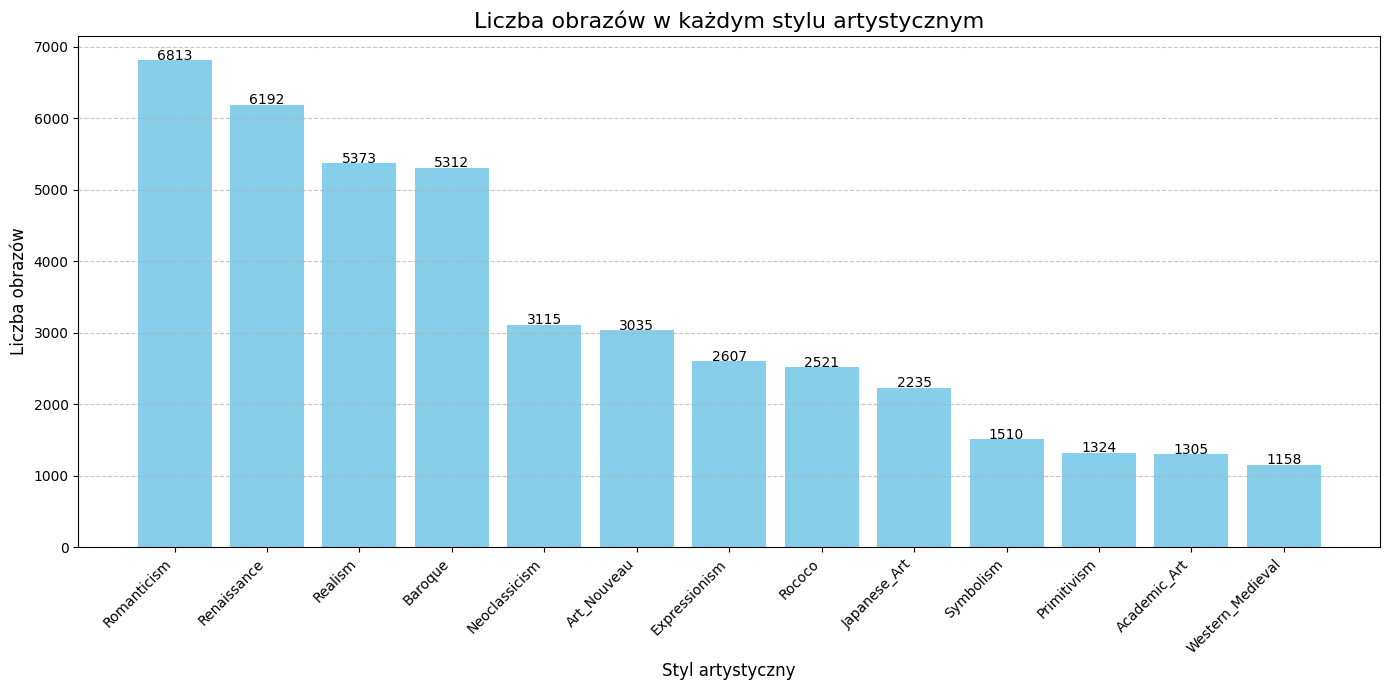

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import random
from collections import Counter
from tqdm import tqdm

def simple_dataset_visualization(input_dir, output_dir):
    """
    Generuje prosty histogram stylów i wyświetla losowe obrazy z każdego stylu.
    
    Args:
        input_dir: Ścieżka do folderu z oryginalnymi obrazami
        output_dir: Ścieżka do folderu, w którym zostaną zapisane wizualizacje
    """
    input_path = Path(input_dir)
    output_path = Path(output_dir)
    output_path.mkdir(parents=True, exist_ok=True)
    
    # Słownik do przechowywania liczby obrazów i przykładowych obrazów
    style_stats = {}
    
    # Iteruj przez style artystyczne (główne foldery)
    style_dirs = [d for d in input_path.iterdir() if d.is_dir()]
    
    for style_dir in tqdm(style_dirs, desc="Analizowanie stylów"):
        style_name = style_dir.name
        style_stats[style_name] = {"count": 0, "sample_image": None}
        
        # Znajdź podfoldery (uwzględnienie podwójnego zagnieżdżenia)
        sub_dirs = [d for d in style_dir.iterdir() if d.is_dir()]
        
        # Lista wszystkich obrazów w tym stylu
        all_style_images = []
        
        # Jeśli istnieją podfoldery, wejdź do nich
        if sub_dirs:
            for sub_dir in sub_dirs:
                image_files = list(sub_dir.glob('*.jpg')) + list(sub_dir.glob('*.png')) + list(sub_dir.glob('*.jpeg'))
                style_stats[style_name]["count"] += len(image_files)
                all_style_images.extend(image_files)
        else:
            # Jeśli nie ma podfolderów, zbierz obrazy bezpośrednio z głównego folderu stylu
            image_files = list(style_dir.glob('*.jpg')) + list(style_dir.glob('*.png')) + list(style_dir.glob('*.jpeg'))
            style_stats[style_name]["count"] += len(image_files)
            all_style_images.extend(image_files)
        
        # Wybierz losowy obraz z tego stylu jako przykład
        if all_style_images:
            style_stats[style_name]["sample_image"] = random.choice(all_style_images)
    
    # Sortuj style według liczby obrazów (malejąco)
    sorted_styles = sorted(style_stats.items(), key=lambda x: x[1]["count"], reverse=True)
    
    # 1. Generuj histogram liczby obrazów w każdym stylu
    plt.figure(figsize=(14, 7))
    style_names = [style for style, _ in sorted_styles]
    style_counts = [stats["count"] for _, stats in sorted_styles]
    
    plt.bar(style_names, style_counts, color='skyblue')
    plt.title('Liczba obrazów w każdym stylu artystycznym', fontsize=16)
    plt.xlabel('Styl artystyczny', fontsize=12)
    plt.ylabel('Liczba obrazów', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Dodaj liczbę obrazów na słupkach
    for i, count in enumerate(style_counts):
        plt.text(i, count + 5, str(count), ha='center', fontsize=10)
    
    plt.tight_layout()
    plt.savefig(output_path / 'style_histogram.png', dpi=150)
    
    # 2. Generuj siatkę z przykładowymi obrazami z każdego stylu
    n_styles = len(sorted_styles)
    cols = 3
    rows = (n_styles + cols - 1) // cols  # Zaokrąglij w górę
    
    plt.figure(figsize=(18, 5 * rows))
    
    for i, (style_name, stats) in enumerate(sorted_styles):
        plt.subplot(rows, cols, i + 1)
        
        if stats["sample_image"]:
            try:
                # Wczytaj i wyświetl losowy obraz
                img = cv2.imread(str(stats["sample_image"]))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                plt.imshow(img)
                plt.title(f"{style_name} ({stats['count']} obrazów)", fontsize=14)
                plt.axis('off')
            except Exception as e:
                plt.text(0.5, 0.5, f"Błąd wczytania obrazu: {e}", ha='center', va='center')
                plt.title(f"{style_name} ({stats['count']} obrazów)", fontsize=14)
                plt.axis('off')
        else:
            plt.text(0.5, 0.5, "Brak obrazów", ha='center', va='center')
            plt.title(style_name, fontsize=14)
            plt.axis('off')
    
    plt.tight_layout()
    plt.savefig(output_path / 'style_samples.png', dpi=150)
    plt.close()
    
    print(f"Wizualizacje zostały zapisane w: {output_path}")
    print(f"- Histogram stylów: {output_path / 'style_histogram.png'}")
    print(f"- Przykładowe obrazy: {output_path / 'style_samples.png'}")
    
    # Zwróć statystyki
    return {
        "total_images": sum(stats["count"] for _, stats in sorted_styles),
        "style_counts": {style: stats["count"] for style, stats in sorted_styles}
    }

# Ścieżki zgodne z podanymi
input_directory = r"C:\Users\Dominik\Desktop\DataSet"
output_directory = r"C:\Users\Dominik\Desktop\visualizations"

if __name__ == "__main__":
    # Wykonaj prostą wizualizację
    stats = simple_dataset_visualization(input_directory, output_directory)
    
    # Wyświetl podstawowe statystyki
    print("\nPodsumowanie datasetu:")
    print(f"Całkowita liczba obrazów: {stats['total_images']}")
    print("\nLiczba obrazów w każdym stylu:")
    for style, count in stats["style_counts"].items():
        print(f"- {style}: {count}")

In [28]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import random
from tqdm import tqdm
import shutil
from PIL import Image, ImageEnhance, ImageOps

def balance_dataset(input_dir, output_dir, min_threshold=2000, max_threshold=3000):
    """
    Balansuje zbiór danych poprzez nadpróbkowanie klas z liczbą obrazów < min_threshold.
    
    Args:
        input_dir: Ścieżka do folderu z przetworzonymi, znormalizowanymi obrazami
        output_dir: Ścieżka do folderu, w którym zostaną zapisane zbalansowane obrazy
        min_threshold: Próg minimalnej liczby obrazów w klasie
        max_threshold: Próg maksymalnej liczby obrazów w klasie (używany dla undersampling)
    """
    input_path = Path(input_dir)
    output_path = Path(output_dir)
    output_path.mkdir(parents=True, exist_ok=True)
    
    # Słownik do przechowywania liczby obrazów w każdym stylu
    style_counts = {}
    
    # Iteruj przez style artystyczne (foldery)
    style_dirs = [d for d in input_path.iterdir() if d.is_dir()]
    
    print("Analizowanie liczby obrazów w każdym stylu...")
    for style_dir in style_dirs:
        style_name = style_dir.name
        image_files = list(style_dir.glob('*.jpg')) + list(style_dir.glob('*.png')) + list(style_dir.glob('*.jpeg'))
        style_counts[style_name] = len(image_files)
    
    # Wyświetl statystyki przed balansowaniem
    print("\nLiczba obrazów przed balansowaniem:")
    for style, count in sorted(style_counts.items(), key=lambda x: x[1]):
        print(f"{style}: {count} obrazów")
    
    # Przetwórz każdy styl
    print("\nRozpoczynanie balansowania datasetu...")
    
    for style_dir in tqdm(style_dirs, desc="Przetwarzanie stylów"):
        style_name = style_dir.name
        count = style_counts[style_name]
        
        # Utwórz folder wyjściowy dla tego stylu
        output_style_dir = output_path / style_name
        output_style_dir.mkdir(exist_ok=True)
        
        # Kopiuj oryginalne obrazy
        image_files = list(style_dir.glob('*.jpg')) + list(style_dir.glob('*.png')) + list(style_dir.glob('*.jpeg'))
        
        for img_path in tqdm(image_files, desc=f"Kopiowanie oryginalnych obrazów {style_name}", leave=False):
            shutil.copy(img_path, output_style_dir / img_path.name)
        
        # Jeśli liczba obrazów jest mniejsza niż min_threshold, wykonaj nadpróbkowanie
        if count < min_threshold:
            print(f"\nNadpróbkowanie stylu {style_name} (obecnie: {count} obrazów)")
            
            # Oblicz, ile dodatkowych obrazów potrzebujemy
            additional_needed = min_threshold - count
            
            # Lista do przechowywania ścieżek nowo utworzonych obrazów
            augmented_paths = []
            
            # Dopóki nie mamy wystarczającej liczby obrazów, generuj nowe
            pbar = tqdm(total=additional_needed, desc=f"Tworzenie augmentacji dla {style_name}", leave=False)
            
            while len(augmented_paths) < additional_needed:
                # Wybierz losowy obraz
                img_path = random.choice(image_files)
                
                # Wybierz losową augmentację
                augment_type = random.choice([
                    'flip', 'rotate', 'brightness', 'contrast', 'blur', 'noise', 'multi'
                ])
                
                try:
                    # Generuj nową nazwę dla augmentowanego obrazu
                    base_name = img_path.stem
                    ext = img_path.suffix
                    new_name = f"{base_name}_aug_{augment_type}_{len(augmented_paths)}{ext}"
                    output_path_aug = output_style_dir / new_name
                    
                    # Wykonaj augmentację
                    if augment_type == 'flip':
                        # Odbij obraz w poziomie za pomocą OpenCV
                        img = cv2.imread(str(img_path))
                        flipped = cv2.flip(img, 1)  # 1 oznacza flip horyzontalny
                        cv2.imwrite(str(output_path_aug), flipped)
                        
                    elif augment_type == 'rotate':
                        # Obróć obraz za pomocą OpenCV
                        img = cv2.imread(str(img_path))
                        angle = random.randint(-20, 20)  # Losowy kąt od -20 do 20 stopni
                        h, w = img.shape[:2]
                        center = (w // 2, h // 2)
                        M = cv2.getRotationMatrix2D(center, angle, 1.0)
                        rotated = cv2.warpAffine(img, M, (w, h), borderMode=cv2.BORDER_REPLICATE)
                        cv2.imwrite(str(output_path_aug), rotated)
                        
                    elif augment_type == 'brightness':
                        # Zmień jasność za pomocą PIL
                        img = Image.open(img_path)
                        factor = random.uniform(0.8, 1.2)  # Losowy współczynnik od 0.8 do 1.2
                        enhancer = ImageEnhance.Brightness(img)
                        bright_img = enhancer.enhance(factor)
                        bright_img.save(output_path_aug)
                        
                    elif augment_type == 'contrast':
                        # Zmień kontrast za pomocą PIL
                        img = Image.open(img_path)
                        factor = random.uniform(0.8, 1.2)  # Losowy współczynnik od 0.8 do 1.2
                        enhancer = ImageEnhance.Contrast(img)
                        contrast_img = enhancer.enhance(factor)
                        contrast_img.save(output_path_aug)
                        
                    elif augment_type == 'blur':
                        # Dodaj rozmycie Gaussa za pomocą OpenCV
                        img = cv2.imread(str(img_path))
                        blur_size = random.choice([3, 5, 7])  # Losowy rozmiar kernela
                        blurred = cv2.GaussianBlur(img, (blur_size, blur_size), 0)
                        cv2.imwrite(str(output_path_aug), blurred)
                        
                    elif augment_type == 'noise':
                        # Dodaj szum za pomocą NumPy i OpenCV
                        img = cv2.imread(str(img_path))
                        noise = np.random.normal(0, 15, img.shape).astype(np.uint8)  # Szum Gaussowski
                        noisy = cv2.add(img, noise)
                        cv2.imwrite(str(output_path_aug), noisy)
                        
                    elif augment_type == 'multi':
                        # Kombinacja kilku transformacji
                        img = cv2.imread(str(img_path))
                        
                        # 1. Flip (50% szansy)
                        if random.random() > 0.5:
                            img = cv2.flip(img, 1)
                            
                        # 2. Niewielka rotacja
                        angle = random.randint(-10, 10)
                        h, w = img.shape[:2]
                        center = (w // 2, h // 2)
                        M = cv2.getRotationMatrix2D(center, angle, 1.0)
                        img = cv2.warpAffine(img, M, (w, h), borderMode=cv2.BORDER_REPLICATE)
                        
                        # 3. Zmiana jasności/kontrastu
                        img_pil = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                        brightness_factor = random.uniform(0.9, 1.1)
                        contrast_factor = random.uniform(0.9, 1.1)
                        
                        enhancer = ImageEnhance.Brightness(img_pil)
                        img_pil = enhancer.enhance(brightness_factor)
                        
                        enhancer = ImageEnhance.Contrast(img_pil)
                        img_pil = enhancer.enhance(contrast_factor)
                        
                        # Konwersja z powrotem do OpenCV
                        img = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)
                        cv2.imwrite(str(output_path_aug), img)
                    
                    # Dodaj ścieżkę do listy
                    augmented_paths.append(output_path_aug)
                    pbar.update(1)
                    
                    # Sprawdź, czy osiągnęliśmy cel
                    if len(augmented_paths) >= additional_needed:
                        break
                        
                except Exception as e:
                    print(f"Błąd podczas augmentacji {img_path}: {e}")
            
            pbar.close()
            print(f"Zakończono nadpróbkowanie {style_name}: dodano {len(augmented_paths)} obrazów (łącznie: {count + len(augmented_paths)})")
        
        # UWAGA: Ta część jest zakomentowana zgodnie z prośbą
        """
        # Jeśli liczba obrazów jest większa niż max_threshold, wykonaj podpróbkowanie
        elif count > max_threshold:
            print(f"\nPodpróbkowanie stylu {style_name} (obecnie: {count} obrazów)")
            
            # Oblicz, ile obrazów należy usunąć
            to_remove = count - max_threshold
            
            # Usuń kopie z folderu wyjściowego (nie z oryginalnego datasetu)
            output_files = list(output_style_dir.glob('*.jpg')) + list(output_style_dir.glob('*.png')) + list(output_style_dir.glob('*.jpeg'))
            
            # Wybierz losowe obrazy do usunięcia
            to_remove_files = random.sample(output_files, to_remove)
            
            for file_path in tqdm(to_remove_files, desc=f"Usuwanie nadmiarowych obrazów {style_name}", leave=False):
                if file_path.exists():
                    file_path.unlink()
            
            print(f"Zakończono podpróbkowanie {style_name}: usunięto {to_remove} obrazów (łącznie: {max_threshold})")
        """
    
    # Wyświetl statystyki po balansowaniu
    print("\nSprawdzanie liczby obrazów po balansowaniu...")
    balanced_counts = {}
    
    for style_dir in output_path.iterdir():
        if style_dir.is_dir():
            style_name = style_dir.name
            image_files = list(style_dir.glob('*.jpg')) + list(style_dir.glob('*.png')) + list(style_dir.glob('*.jpeg'))
            balanced_counts[style_name] = len(image_files)
    
    print("\nLiczba obrazów po balansowaniu:")
    for style, count in sorted(balanced_counts.items(), key=lambda x: x[1]):
        print(f"{style}: {count} obrazów")
    
    # Generuj histogram porównawczy przed i po balansowaniu
    plt.figure(figsize=(14, 8))
    
    styles = list(style_counts.keys())
    original_counts = [style_counts[style] for style in styles]
    balanced_counts_list = [balanced_counts[style] for style in styles]
    
    x = np.arange(len(styles))
    width = 0.35
    
    plt.bar(x - width/2, original_counts, width, label='Przed balansowaniem')
    plt.bar(x + width/2, balanced_counts_list, width, label='Po balansowaniu')
    
    plt.xlabel('Styl artystyczny')
    plt.ylabel('Liczba obrazów')
    plt.title('Porównanie liczby obrazów przed i po balansowaniu')
    plt.xticks(x, styles, rotation=45, ha='right')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig(output_path.parent / 'balance_comparison.png')
    plt.close()
    
    return balanced_counts

def visualize_augmentation_examples(input_dir, output_dir, balanced_dir):
    """
    Tworzy wizualizację pokazującą przykłady augmentowanych obrazów.
    
    Args:
        input_dir: Ścieżka do folderu z oryginalnymi znormalizowanymi obrazami
        output_dir: Ścieżka do folderu, w którym zostaną zapisane wizualizacje
        balanced_dir: Ścieżka do folderu ze zbalansowanymi obrazami
    """
    input_path = Path(input_dir)
    output_path = Path(output_dir)
    balanced_path = Path(balanced_dir)
    output_path.mkdir(parents=True, exist_ok=True)
    
    # Znajdź style, które zostały nadpróbkowane
    augmented_styles = []
    
    for style_dir in balanced_path.iterdir():
        if not style_dir.is_dir():
            continue
            
        style_name = style_dir.name
        original_dir = input_path / style_name
        
        if not original_dir.exists():
            continue
            
        original_count = len(list(original_dir.glob('*.jpg')))
        augmented_count = len(list(style_dir.glob('*.jpg')))
        
        if augmented_count > original_count:
            augmented_styles.append((style_name, original_count, augmented_count))
    
    # Wybierz kilka stylów do wizualizacji
    styles_to_show = min(4, len(augmented_styles))
    selected_styles = random.sample(augmented_styles, styles_to_show) if augmented_styles else []
    
    if not selected_styles:
        print("Brak stylów z augmentacją do wyświetlenia.")
        return
    
    # Dla każdego wybranego stylu, pokaż oryginalny obraz i kilka jego augmentacji
    fig, axes = plt.subplots(styles_to_show, 5, figsize=(20, 5*styles_to_show))
    
    for i, (style_name, _, _) in enumerate(selected_styles):
        # Znajdź wszystkie oryginalne obrazy
        original_dir = input_path / style_name
        original_images = list(original_dir.glob('*.jpg'))
        
        if not original_images:
            continue
            
        # Wybierz jeden oryginalny obraz
        original_img_path = random.choice(original_images)
        original_img = cv2.imread(str(original_img_path))
        original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
        
        # Wyświetl oryginalny obraz
        axes[i, 0].imshow(original_img)
        axes[i, 0].set_title(f"{style_name}\nOryginalny")
        axes[i, 0].axis('off')
        
        # Znajdź augmentowane wersje tego obrazu w folderze zbalansowanym
        base_name = original_img_path.stem
        augmented_dir = balanced_path / style_name
        augmented_images = list(augmented_dir.glob(f"{base_name}_aug_*.jpg"))
        
        # Jeśli nie ma augmentacji dla tego konkretnego obrazu, znajdź jakiekolwiek augmentacje
        if not augmented_images:
            augmented_images = list(augmented_dir.glob("*_aug_*.jpg"))
        
        # Pokaż do 4 różnych augmentacji
        for j in range(1, 5):
            if j <= len(augmented_images):
                aug_img_path = augmented_images[j-1]
                aug_img = cv2.imread(str(aug_img_path))
                aug_img = cv2.cvtColor(aug_img, cv2.COLOR_BGR2RGB)
                
                # Wyodrębnij typ augmentacji z nazwy pliku
                aug_type = "nieznany"
                if "_aug_" in aug_img_path.stem:
                    aug_type = aug_img_path.stem.split('_aug_')[1].split('_')[0]
                
                axes[i, j].imshow(aug_img)
                axes[i, j].set_title(f"Augmentacja\n{aug_type}")
                axes[i, j].axis('off')
            else:
                axes[i, j].axis('off')
    
    plt.tight_layout()
    plt.savefig(output_path / 'augmentation_examples.png')
    plt.close()
    
    print(f"Zapisano przykłady augmentacji w: {output_path / 'augmentation_examples.png'}")

# Zaktualizowane ścieżki
input_normalized = r"C:\Users\Dominik\Desktop\outData"  # Znormalizowane obrazy
output_balanced = r"C:\Users\Dominik\Desktop\Balanced"    # Zbalansowane obrazy
visualizations_dir = r"C:\Users\Dominik\Desktop\visualizations"  # Wizualizacje

if __name__ == "__main__":
    # Wykonaj balansowanie datasetu
    balanced_counts = balance_dataset(
        input_normalized, 
        output_balanced, 
        min_threshold=2000,  # Nadpróbkuj jeśli mniej niż 2000 obrazów
        max_threshold=3000   # Podpróbkuj jeśli więcej niż 3000 obrazów (zakomentowane)
    )
    
    # Wizualizuj przykłady augmentacji
    visualize_augmentation_examples(
        input_normalized,
        visualizations_dir,
        output_balanced
    )
    
    print("\nZakończono proces balansowania datasetu!")
    stats = simple_dataset_visualization(input_normalized, output_balanced)

Analizowanie liczby obrazów w każdym stylu...

Liczba obrazów przed balansowaniem:
balanced: 0 obrazów
Western_Medieval: 1158 obrazów
Academic_Art: 1305 obrazów
Primitivism: 1324 obrazów
Symbolism: 1510 obrazów
Japanese_Art: 2233 obrazów
Rococo: 2521 obrazów
Expressionism: 2607 obrazów
Art_Nouveau: 3034 obrazów
Neoclassicism: 3115 obrazów
Baroque: 5308 obrazów
Realism: 5373 obrazów
Renaissance: 6190 obrazów
Romanticism: 6812 obrazów

Rozpoczynanie balansowania datasetu...


Przetwarzanie stylów:   0%|          | 0/14 [00:00<?, ?it/s]


Nadpróbkowanie stylu Academic_Art (obecnie: 1305 obrazów)


Przetwarzanie stylów:   7%|▋         | 1/14 [00:26<05:49, 26.89s/it]

Zakończono nadpróbkowanie Academic_Art: dodano 695 obrazów (łącznie: 2000)


Przetwarzanie stylów:  14%|█▍        | 2/14 [01:13<07:39, 38.32s/it]


Nadpróbkowanie stylu balanced (obecnie: 0 obrazów)


Przetwarzanie stylów:  14%|█▍        | 2/14 [01:13<07:19, 36.62s/it]


IndexError: Cannot choose from an empty sequence